In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader.data as web
import datetime as dt
import stock_function as stock

plt.style.use("seaborn")

In [2]:
#Load stock data
company = "BTC-USD"
start = dt.date(2015, 1, 1)
end = dt.date.today()

df = web.DataReader(company, "yahoo", start, end)
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-01,320.434998,314.002991,320.434998,314.248993,8036550,314.248993
2015-01-02,315.838989,313.565002,314.079010,315.032013,7860650,315.032013
2015-01-03,315.149994,281.082001,314.846008,281.082001,33054400,281.082001
2015-01-04,287.230011,257.612000,281.145996,264.195007,55629100,264.195007
2015-01-05,278.341003,265.084015,265.084015,274.473999,43962800,274.473999
...,...,...,...,...,...,...
2022-04-03,47313.476562,45634.105469,45859.128906,46453.566406,25414397610,46453.566406
2022-04-04,46791.089844,45235.816406,46445.273438,46622.675781,32499785455,46622.675781
2022-04-05,47106.140625,45544.808594,46624.507812,45555.992188,29640604055,45555.992188


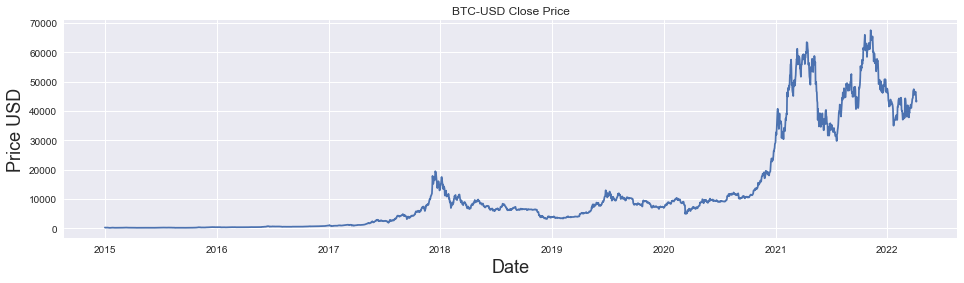

In [3]:
#Visually show the stock price
plt.figure(figsize=(16, 4))
plt.plot(df['Close'], label='Close')
plt.title(f'{company} Close Price')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Price USD', fontsize=18)
plt.show()


In [4]:
#Calculate the On Balance Volume (OBV)
OBV = []
OBV.append(0)

#Loop through the data set (close price) from the second row (index 1) to the end of the data set
for i in range(1, len(df.Close)):
    if df.Close[i] > df.Close[i-1]:
        OBV.append(OBV[-1] + df.Volume[i])
    elif df.Close[i] < df.Close[i-1]:
        OBV.append(OBV[-1] - df.Volume[i])
    else:
        OBV.append(OBV[-1])

In [5]:
#Store the OBV and OBV Exponential Moving Average (EMA) into new columns
df['OBV'] = OBV
df['OBV_EMA'] = df['OBV'].ewm(span=20).mean()
#Show the data
df

,High,Low,Open,Close,Volume,Adj Close,OBV,OBV_EMA
Date,,,,,,,,
2015-01-01,320.434998,314.002991,320.434998,314.248993,8036550,314.248993,0,0.000000e+00
2015-01-02,315.838989,313.565002,314.079010,315.032013,7860650,315.032013,7860650,4.126841e+06
2015-01-03,315.149994,281.082001,314.846008,281.082001,33054400,281.082001,-25193750,-6.639504e+06
2015-01-04,287.230011,257.612000,281.145996,264.195007,55629100,264.195007,-80822850,-2.805509e+07
2015-01-05,278.341003,265.084015,265.084015,274.473999,43962800,274.473999,-36860050,-3.018493e+07
...,...,...,...,...,...,...,...,...
2022-04-03,47313.476562,45634.105469,45859.128906,46453.566406,25414397610,46453.566406,1922341268242,1.845682e+12
2022-04-04,46791.089844,45235.816406,46445.273438,46622.675781,32499785455,46622.675781,1954841053697,1.856078e+12
2022-04-05,47106.140625,45544.808594,46624.507812,45555.992188,29640604055,45555.992188,1925200449642,1.862662e+12


In [6]:
def add_obv_and_obv_ema(df):
    #Calculate the On Balance Volume (OBV)
    OBV = []
    OBV.append(0)

    #Loop through the data set (close price) from the second row (index 1) to the end of the data set
    for i in range(1, len(df.Close)):
        if df.Close[i] > df.Close[i-1]:
            OBV.append(OBV[-1] + df.Volume[i])
        elif df.Close[i] < df.Close[i-1]:
            OBV.append(OBV[-1] - df.Volume[i])
        else:
            OBV.append(OBV[-1])
    
    #Store the OBV and OBV Exponential Moving Average (EMA) into new columns
    df['OBV'] = OBV
    df['OBV_EMA'] = df['OBV'].ewm(span=20).mean()
    
    return df

In [7]:
test_df = web.DataReader(company, "yahoo", start, end)
test_df = add_obv_and_obv_ema(test_df)
test_df

,High,Low,Open,Close,Volume,Adj Close,OBV,OBV_EMA
Date,,,,,,,,
2015-01-01,320.434998,314.002991,320.434998,314.248993,8036550,314.248993,0,0.000000e+00
2015-01-02,315.838989,313.565002,314.079010,315.032013,7860650,315.032013,7860650,4.126841e+06
2015-01-03,315.149994,281.082001,314.846008,281.082001,33054400,281.082001,-25193750,-6.639504e+06
2015-01-04,287.230011,257.612000,281.145996,264.195007,55629100,264.195007,-80822850,-2.805509e+07
2015-01-05,278.341003,265.084015,265.084015,274.473999,43962800,274.473999,-36860050,-3.018493e+07
...,...,...,...,...,...,...,...,...
2022-04-03,47313.476562,45634.105469,45859.128906,46453.566406,25414397610,46453.566406,1922341268242,1.845682e+12
2022-04-04,46791.089844,45235.816406,46445.273438,46622.675781,32499785455,46622.675781,1954841053697,1.856078e+12
2022-04-05,47106.140625,45544.808594,46624.507812,45555.992188,29640604055,45555.992188,1925200449642,1.862662e+12


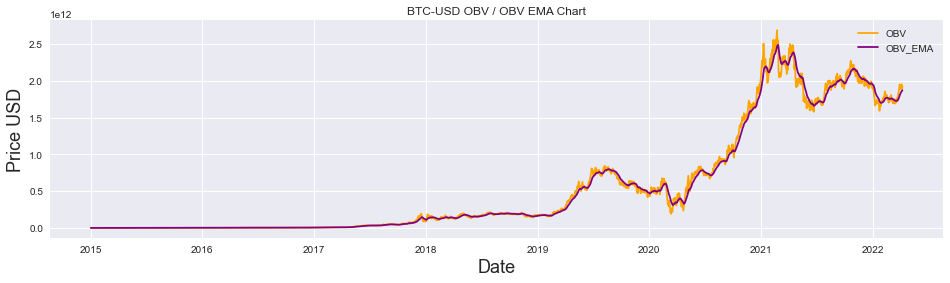

In [8]:
#Plot the buy and sell prices
plt.figure(figsize=(16, 4))
plt.plot(df['OBV'], label='OBV', color ='orange')
plt.plot(df['OBV_EMA'], label='OBV_EMA', color='purple')
plt.title(f'{company} OBV / OBV EMA Chart')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Price USD', fontsize=18)
plt.legend()
plt.show()


In [9]:
#Create a function to signal when to buy and sell the stock
# If OBV > OBV_EMA Then Buy
# IF OBV < OBV_EMA Then Sell
# Else Do Nothing

def obv_indicator(df, col1, col2):
    sigPriceBuy, sigPriceSell = [], []
    flag = -1
    #Loop through the length of the data set
    for i in range(0, len(df)):
        # If OBV > OBV_EMA Then Buy --> col1 => 'OBV' and col2 => 'OBV_EMA'
        if df[col1][i] > df[col2][i] and flag != 1:
            sigPriceBuy.append(df['Close'][i])
            sigPriceSell.append(np.nan)
            flag = 1
        # IF OBV < OBV_EMA Then Sell
        elif df[col1][i] < df[col2][i] and flag != 0:
            sigPriceSell.append(df['Close'][i])
            sigPriceBuy.append(np.nan)
            flag = 0
        else:
            sigPriceSell.append(np.nan)
            sigPriceBuy.append(np.nan)
            
    return (sigPriceBuy, sigPriceSell)

In [10]:
#Create buy and sell columns
x = obv_indicator(df, 'OBV', 'OBV_EMA')
df['Buy_Signal_Price'] = x[0]
df['Sell_Signal_Price'] = x[1]
#Show the data set
df

,High,Low,Open,Close,Volume,Adj Close,OBV,OBV_EMA,Buy_Signal_Price,Sell_Signal_Price
Date,,,,,,,,,,
2015-01-01,320.434998,314.002991,320.434998,314.248993,8036550,314.248993,0,0.000000e+00,NaN,NaN
2015-01-02,315.838989,313.565002,314.079010,315.032013,7860650,315.032013,7860650,4.126841e+06,315.032013,NaN
2015-01-03,315.149994,281.082001,314.846008,281.082001,33054400,281.082001,-25193750,-6.639504e+06,NaN,281.082001
2015-01-04,287.230011,257.612000,281.145996,264.195007,55629100,264.195007,-80822850,-2.805509e+07,NaN,NaN
2015-01-05,278.341003,265.084015,265.084015,274.473999,43962800,274.473999,-36860050,-3.018493e+07,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2022-04-03,47313.476562,45634.105469,45859.128906,46453.566406,25414397610,46453.566406,1922341268242,1.845682e+12,NaN,NaN
2022-04-04,46791.089844,45235.816406,46445.273438,46622.675781,32499785455,46622.675781,1954841053697,1.856078e+12,NaN,NaN
2022-04-05,47106.140625,45544.808594,46624.507812,45555.992188,29640604055,45555.992188,1925200449642,1.862662e+12,NaN,NaN


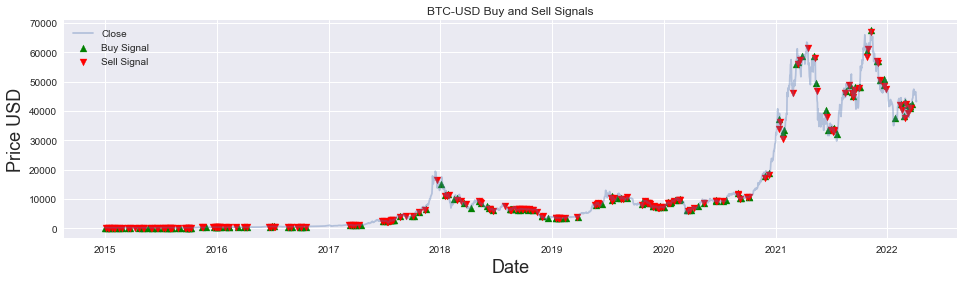

In [11]:
#Plot the buy and sell prices
plt.figure(figsize=(16, 4))
plt.plot(df['Close'], label='Close', alpha = 0.35)
plt.scatter(df.index, df['Buy_Signal_Price'], label='Buy Signal', marker = '^', alpha= 1, color='green')
plt.scatter(df.index, df['Sell_Signal_Price'], label='Sell Signal', marker = 'v', alpha=1, color='red')
plt.title(f'{company} Buy and Sell Signals')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Price USD', fontsize=18)
plt.legend()
plt.show()

In [12]:
fct_df = web.DataReader(company, "yahoo", start, end)
fct_df = stock.on_balance_volume(fct_df)
fct_df = stock.obv_indicator(fct_df, 'OBV', 'OBV_EMA')
fct_df

,High,Low,Open,Close,Volume,Adj Close,OBV,OBV_EMA,Buy_Signal_Price,Sell_Signal_Price
Date,,,,,,,,,,
2015-01-01,320.434998,314.002991,320.434998,314.248993,8036550,314.248993,0,0.000000e+00,NaN,NaN
2015-01-02,315.838989,313.565002,314.079010,315.032013,7860650,315.032013,7860650,4.126841e+06,315.032013,NaN
2015-01-03,315.149994,281.082001,314.846008,281.082001,33054400,281.082001,-25193750,-6.639504e+06,NaN,281.082001
2015-01-04,287.230011,257.612000,281.145996,264.195007,55629100,264.195007,-80822850,-2.805509e+07,NaN,NaN
2015-01-05,278.341003,265.084015,265.084015,274.473999,43962800,274.473999,-36860050,-3.018493e+07,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2022-04-03,47313.476562,45634.105469,45859.128906,46453.566406,25414397610,46453.566406,1922341268242,1.845682e+12,NaN,NaN
2022-04-04,46791.089844,45235.816406,46445.273438,46622.675781,32499785455,46622.675781,1954841053697,1.856078e+12,NaN,NaN
2022-04-05,47106.140625,45544.808594,46624.507812,45555.992188,29640604055,45555.992188,1925200449642,1.862662e+12,NaN,NaN


#### OBV Strategy Backtester

In [13]:
company = ["AAPL", "BTC-USD", "FB", "GOOG", "MSFT", "TSLA"]
start = dt.date(2015, 1, 1)
end = dt.date.today()
raw = web.DataReader(company, "yahoo", start, end)
raw.columns = pd.MultiIndex.from_tuples(raw.columns)
raw = raw.resample("B").mean().dropna()
raw.head()

Adj Close                                                \
                 AAPL     BTC-USD         FB        GOOG       MSFT   
Date                                                                  
2015-01-02  24.714508  286.769674  78.449997  523.373108  41.108841   
2015-01-05  24.018267  274.473999  77.190002  512.463013  40.730808   
2015-01-06  24.020523  286.188995  76.150002  500.585632  40.132977   
2015-01-07  24.357340  294.337006  76.150002  499.727997  40.642879   
2015-01-08  25.293207  283.348999  78.180000  501.303680  41.838520   

                           Close                                     ...  \
                 TSLA       AAPL     BTC-USD         FB        GOOG  ...   
Date                                                                 ...   
2015-01-02  43.862000  27.332500  286.769674  78.449997  523.373108  ...   
2015-01-05  42.018002  26.562500  274.473999  77.190002  512.463013  ...   
2015-01-06  42.256001  26.565001  286.188995  76.150002  500.585632  ...   
2015-01-07  42.189999  26.937500  294.337006  76.150002  499.727997  ...   
2015-01-08  42.124001  27.972500  283.348999  78.180000  501.303680  ...   

                 Open                                         Volume  \
                   FB        GOOG       MSFT       TSLA         AAPL   
Date                                                                   
2015-01-02  78.580002  527.561584  46.660000  44.574001  212818400.0   
2015-01-05  77.980003  521.827332  46.369999  42.910000  257142000.0   
2015-01-06  77.230003  513.589966  46.380001  42.012001  263188400.0   
2015-01-07  76.760002  505.611847  45.980000  42.669998  160423600.0   
2015-01-08  76.739998  496.626526  46.750000  42.562000  237458000.0   

                                                                         
                 BTC-USD          FB       GOOG        MSFT        TSLA  
Date                                                                     
2015-01-02  3.218138e+07  18177500.0  1447563.0  27913900.0  23822000.0  
2015-01-05  4.396280e+07  26452200.0  2059840.0  39673900.0  26842500.0  
2015-01-06  2.324570e+07  27399300.0  2899940.0  36447900.0  31309500.0  
2015-01-07  2.486680e+07  22045300.0  2065054.0  29114100.0  14842000.0  
2015-01-08  1.998250e+07  23961000.0  3353582.0  29645200.0  17212500.0  

[5 rows x 36 columns]

In [14]:
raw = raw[['Close', 'Volume']]
raw = raw.swaplevel(axis = 1).sort_index(axis = 1)
raw.head()

AAPL                  BTC-USD                       FB  \
                Close       Volume       Close        Volume      Close   
Date                                                                      
2015-01-02  27.332500  212818400.0  286.769674  3.218138e+07  78.449997   
2015-01-05  26.562500  257142000.0  274.473999  4.396280e+07  77.190002   
2015-01-06  26.565001  263188400.0  286.188995  2.324570e+07  76.150002   
2015-01-07  26.937500  160423600.0  294.337006  2.486680e+07  76.150002   
2015-01-08  27.972500  237458000.0  283.348999  1.998250e+07  78.180000   

                              GOOG                  MSFT              \
                Volume       Close     Volume      Close      Volume   
Date                                                                   
2015-01-02  18177500.0  523.373108  1447563.0  46.759998  27913900.0   
2015-01-05  26452200.0  512.463013  2059840.0  46.330002  39673900.0   
2015-01-06  27399300.0  500.585632  2899940.0  45.650002  36447900.0   
2015-01-07  22045300.0  499.727997  2065054.0  46.230000  29114100.0   
2015-01-08  23961000.0  501.303680  3353582.0  47.590000  29645200.0   

                 TSLA              
                Close      Volume  
Date                               
2015-01-02  43.862000  23822000.0  
2015-01-05  42.018002  26842500.0  
2015-01-06  42.256001  31309500.0  
2015-01-07  42.189999  14842000.0  
2015-01-08  42.124001  17212500.0

In [15]:
symbol = "BTC-USC"
raw = raw["BTC-USD"]
raw = raw.loc[start:end]
raw.head()

,Close,Volume
Date,,
2015-01-02,286.769674,3.218138e+07
2015-01-05,274.473999,4.396280e+07
2015-01-06,286.188995,2.324570e+07
2015-01-07,294.337006,2.486680e+07
2015-01-08,283.348999,1.998250e+07


In [16]:
raw["returns"] = np.log(raw.Close / raw.Close.shift(1))
raw.head()

,Close,Volume,returns
Date,,,
2015-01-02,286.769674,3.218138e+07,NaN
2015-01-05,274.473999,4.396280e+07,-0.043823
2015-01-06,286.188995,2.324570e+07,0.041796
2015-01-07,294.337006,2.486680e+07,0.028073
2015-01-08,283.348999,1.998250e+07,-0.038046
